# Machine Learning Project

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [3]:
# import spotify api for python
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

### Connect to Spotify API

In [4]:
# credentials
client_id= "..."
client_secret= "..."
redirect_uri='http://google.com/'

In [5]:
# set scope
username='1257375947'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret) 
scope = 'user-library-read playlist-read-private'
try:
    token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)  
    sp=spotipy.Spotify(auth= token)
except:
    print('Token is not accesible for ' + username)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=840c2d539dab43b3810cd5d568ded445&response_type=code&redirect_uri=http%3A%2F%2Fgoogle.com%2F&scope=playlist-read-private+user-library-read in your browser


Enter the URL you were redirected to: https://www.google.com/?code=AQCaHsMZmo-97d9PXfdMGJJW4YqSJAILLlYOJIrc8Qs4nxs_CUI5QXq1lWmm-ukg5oTLpIvsDv0Kd1hDxQupmul2KEmZDHc2OhRTNsoy5HMyUTVp1J4WWt0SfYf7tf6Mkf_u_lkQCaMm5LOJu9DjwswLCR5wy8k-5XYa3qJL90B0IDIZqchV68NrwOVTwn4ywzpHX4XU_E1R4972M5kUAl3cth8p85wMJb8yqcni4EbONQ




### Pull Hip-Hop and Classical Playlist Data

In [83]:
# get playlists
songLibrary = sp.current_user_saved_tracks()
# hip-hop playlists
hh_playlist = sp.user_playlist('spotify', playlist_id='37i9dQZF1DWY4xHQp97fN6') # Get Turnt
hh_playlist2 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DX9s3cYAeKW5d') # Hip-Hop Work Out Mix
hh_playlist3 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DX6GwdWRQMQpq') # Feelin' Myself
hh_playlist4 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DX2RxBh64BHjQ') # Most Necessary

# classical playlists
# cl_playlist = sp.user_playlist('spotify', playlist_id='37i9dQZF1DWWEJlAGA9gs0') # Classical Essentials
cl_playlist2 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DXd5zUwdn6lPb') # Classical Focus
# cl_playlist3 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DX4s3V2rTswzO') # Classical Romance
cl_playlist4 = sp.user_playlist('spotify', playlist_id='37i9dQZF1DWV0gynK7G6pD') # Classical New Releases

In [84]:
# get tracks
def get_tracks(playlist):
  tracks = playlist["tracks"]
  songs = tracks["items"] 
  while tracks['next']:
      tracks = sp.next(tracks)
      for item in tracks["items"]:
          songs.append(item)
  ids = [] 
  for i in range(len(songs)):
      ids.append(songs[i]['track']['id'])
  return(ids)

In [85]:
# Hip-hop ids
hh_ids = get_tracks(hh_playlist)
hh_ids2 = get_tracks(hh_playlist2)
hh_ids3 = get_tracks(hh_playlist3)
hh_ids4 = get_tracks(hh_playlist4)

hh_ids_all = hh_ids+hh_ids2+hh_ids3+hh_ids4

# Classical ids
# cl_ids = get_tracks(cl_playlist)
cl_ids2 = get_tracks(cl_playlist2)
# cl_ids3 = get_tracks(cl_playlist3)
# cl_ids4 = get_tracks(cl_playlist4)

cl_ids_all = cl_ids2+cl_ids4#+cl_ids3+cl_ids4

In [86]:
# remove duplicates
def keep_unique(test_list):
    res = [] 
    for i in test_list: 
        if i not in res: 
            res.append(i)
    return(res)

In [87]:
# remove duplicates and check length --trying to keep classes balanced
hh_ids_uniq = keep_unique(hh_ids_all)
print('# of Hip-Hop tracks:', len(hh_ids_uniq))
cl_ids_uniq = keep_unique(cl_ids_all)
print('# of Classical Tracks:', len(cl_ids_uniq))

# of Hip-Hop tracks: 285
# of Classical Tracks: 294


In [88]:
# get audio features
def get_features(ids):
  features = []
  for i in range(0,len(ids)):
      audio_features = sp.audio_features(ids[i:i+1])
      for track in audio_features:
          features.append(track)
          features[-1]['target'] = 1
  return(features)

In [90]:
# Hip-hop features
hh_features = get_features(hh_ids_uniq)
# hh_features2 = get_features(hh_ids2)
# hh_features3 = get_features(hh_ids3)
# hh_features4 = get_features(hh_ids4)

# Classical features
cl_features = get_features(cl_ids_uniq)
# cl_features2 = get_features(cl_ids2)
# cl_features3 = get_features(cl_ids3)
# cl_features4 = get_features(cl_ids4)

In [93]:
# Add new 'genre' column with Hip_hop = 0, and Classical = 1
hh_features = pd.DataFrame(hh_features)
hh_features['genre'] = 0

cl_features = pd.DataFrame(cl_features)
cl_features['genre'] = 1

### EDA

In [94]:
hh_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target,genre
0,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.210,0.0605,76.469,audio_features,3eekarcy7kvN4yt5ZFzltW,spotify:track:3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/tracks/3eekarcy7kvN...,https://api.spotify.com/v1/audio-analysis/3eek...,175721,4,1,0
1,0.882,0.602,11,-5.554,1,0.2450,0.0177,0.000000,0.178,0.4300,142.959,audio_features,598yNsG1JFrGd4n2kMoz7F,spotify:track:598yNsG1JFrGd4n2kMoz7F,https://api.spotify.com/v1/tracks/598yNsG1JFrG...,https://api.spotify.com/v1/audio-analysis/598y...,183011,4,1,0
2,0.769,0.787,11,-3.909,1,0.3670,0.1890,0.000000,0.129,0.8360,126.770,audio_features,6Ozh9Ok6h4Oi1wUSLtBseN,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,https://api.spotify.com/v1/tracks/6Ozh9Ok6h4Oi...,https://api.spotify.com/v1/audio-analysis/6Ozh...,159715,4,1,0
3,0.924,0.466,4,-9.472,0,0.2440,0.0401,0.000000,0.109,0.5390,130.038,audio_features,5ravc2aiNoYmu9m37diYXW,spotify:track:5ravc2aiNoYmu9m37diYXW,https://api.spotify.com/v1/tracks/5ravc2aiNoYm...,https://api.spotify.com/v1/audio-analysis/5rav...,146656,4,1,0
4,0.753,0.652,10,-5.943,0,0.0753,0.4440,0.000000,0.117,0.7450,139.962,audio_features,5hDAT527wXWNBnJlujhuUs,spotify:track:5hDAT527wXWNBnJlujhuUs,https://api.spotify.com/v1/tracks/5hDAT527wXWN...,https://api.spotify.com/v1/audio-analysis/5hDA...,123560,4,1,0


In [95]:
# Print Hip-Hop's summary stats
print('Hip-Hop:')
hh_features.describe().round(2)

Hip-Hop:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target,genre
count,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.00,285.0,285.0
mean,0.78,0.63,5.04,-6.29,0.52,0.22,0.15,0.00,0.16,0.50,126.46,184464.73,3.97,1.0,0.0
std,0.12,0.12,3.68,1.97,0.50,0.12,0.16,0.01,0.11,0.20,30.20,37703.70,0.30,0.0,0.0
min,0.29,0.24,0.00,-15.54,0.00,0.03,0.00,0.00,0.03,0.06,76.06,104591.00,1.00,1.0,0.0
25%,0.72,0.55,1.00,-7.32,0.00,0.12,0.02,0.00,0.10,0.36,98.06,156893.00,4.00,1.0,0.0
50%,0.81,0.63,5.00,-6.03,1.00,0.22,0.08,0.00,0.12,0.48,128.04,181109.00,4.00,1.0,0.0
75%,0.87,0.72,8.00,-4.97,1.00,0.31,0.22,0.00,0.17,0.64,150.06,207517.00,4.00,1.0,0.0
max,0.97,0.96,11.00,-2.61,1.00,0.70,0.86,0.09,0.89,0.96,204.08,328800.00,5.00,1.0,0.0


In [96]:
# Print Classical's summary stats
print('Classical:')
cl_features.describe().round(2)

Classical:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target,genre
count,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.0,294.0
mean,0.32,0.08,5.42,-25.56,0.70,0.05,0.94,0.75,0.13,0.23,101.37,222335.34,3.59,1.0,1.0
std,0.14,0.08,3.37,6.33,0.46,0.02,0.11,0.30,0.07,0.20,31.37,152959.37,0.79,0.0,0.0
min,0.06,0.00,0.00,-44.35,0.00,0.03,0.01,0.00,0.05,0.02,35.90,52907.00,1.00,1.0,1.0
25%,0.22,0.02,2.00,-30.00,0.00,0.04,0.94,0.73,0.09,0.07,74.79,127614.25,3.00,1.0,1.0
50%,0.33,0.05,5.00,-25.55,1.00,0.04,0.98,0.89,0.11,0.16,92.75,186800.00,4.00,1.0,1.0
75%,0.41,0.10,8.75,-21.00,1.00,0.05,0.99,0.92,0.14,0.32,125.51,267273.00,4.00,1.0,1.0
max,0.71,0.50,11.00,-9.83,1.00,0.26,1.00,0.99,0.58,0.98,182.60,1609307.00,5.00,1.0,1.0


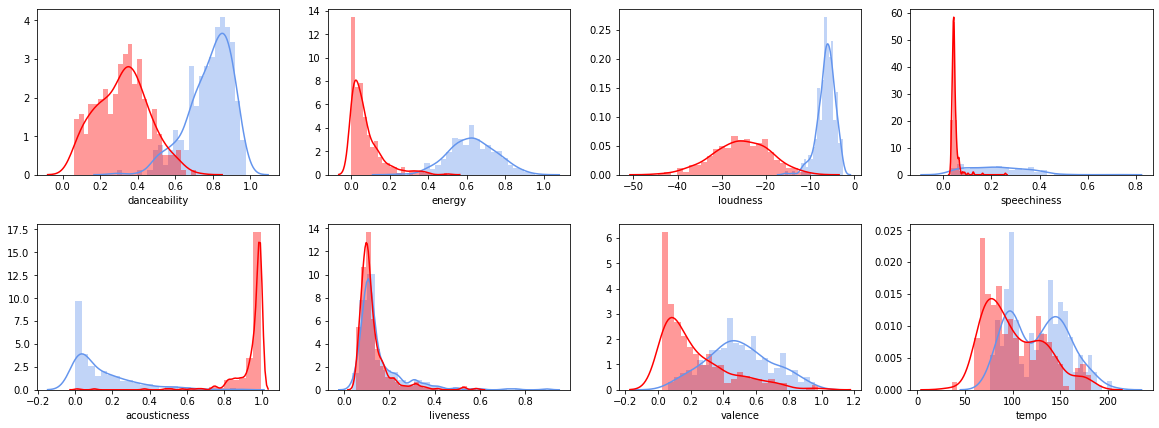

In [97]:
# Build grid comparing features distributions
# Hip-Hop = Blue
# Classical = Red

fig = plt.figure(figsize=(20,7))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
# danceabliity
ax = fig.add_subplot(2, 4, 1)
sns.distplot(hh_features.iloc[:,0], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,0], bins=25, color='red')
# energy
ax = fig.add_subplot(2, 4, 2)
sns.distplot(hh_features.iloc[:,1], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,1], bins=25, color='red')
# loudness
ax = fig.add_subplot(2, 4, 3)
sns.distplot(hh_features.iloc[:,3], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,3], bins=25, color='red')
# speechiness	
ax = fig.add_subplot(2, 4, 4)
sns.distplot(hh_features.iloc[:,5], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,5], bins=25, color='red')
# acousticness
ax = fig.add_subplot(2, 4, 5)
sns.distplot(hh_features.iloc[:,6], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,6], bins=25, color='red')
# liveliness
ax = fig.add_subplot(2, 4, 6)
sns.distplot(hh_features.iloc[:,8], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,8], bins=25, color='red')
# valence
ax = fig.add_subplot(2, 4, 7)
sns.distplot(hh_features.iloc[:,9], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,9], bins=25, color='red')
# tempo
ax = fig.add_subplot(2, 4, 8)
sns.distplot(hh_features.iloc[:,10], bins=25, color='cornflowerblue')
sns.distplot(cl_features.iloc[:,10], bins=25, color='red')

In [99]:
# Compare mean features between two playlists
categories = np.array(hh_features.columns)
categories = categories[np.array([0,1,5,6,7,8,9])]

hh_mean = pd.DataFrame(hh_features.mean()).transpose()
cl_mean = pd.DataFrame(cl_features.mean()).transpose()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=hh_mean.iloc[0,np.r_[0,1,5:10]],
      theta=categories,
      fill='toself',
      name='Hip_Hop',
))
fig.add_trace(go.Scatterpolar(
      r=cl_mean.iloc[0,np.r_[0,1,5:10]],
      theta=categories,
      fill='toself',
      name='Classical'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()